# TripAdvisor Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import matplotlib as mpl

# Reading the dataset and basic processing

In [6]:
data = pd.read_excel("./Potential datasets for recruitment.xlsx", sheet_name=0)
data.head().to_html('a')

In [7]:
data[data['Member years'] == -1806]

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
75,USA,17,9,16,5,Dec-Feb,Solo,YES,YES,YES,YES,YES,YES,Treasure Island- TI Hotel & Casino,4,2884,North America,-1806,February,Monday


In [140]:
data.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Swimming Pool        object
Exercise Room        object
Basketball Court     object
Yoga Classes         object
Club                 object
Free Wifi            object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [141]:
data.count()

User country         504
Nr. reviews          504
Nr. hotel reviews    504
Helpful votes        504
Score                504
Period of stay       504
Traveler type        504
Swimming Pool        504
Exercise Room        504
Basketball Court     504
Yoga Classes         504
Club                 504
Free Wifi            504
Hotel name           504
Hotel stars          504
Nr. rooms            504
User continent       504
Member years         504
Review month         504
Review weekday       504
dtype: int64

Data is devoid of NaN values. Hence, we don't have to worry about missing values.

In [142]:
data.Score.mean() #Data has lots of high ratings. Mildly skewed.

4.123015873015873

In [143]:
bin_dict = {'YES' : 1,
            'NO' : 0}
cols_to_replace = ['Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi']
data.replace({x : bin_dict for x in cols_to_replace}, inplace=True)

# Column analysis and Visualisation

In [144]:
data['User country'].value_counts()

USA                     217
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Egypt                     5
New Zeland                5
Brazil                    5
Netherlands               4
Singapore                 4
Thailand                  3
Israel                    3
Norway                    3
Malaysia                  3
Hawaii                    3
Finland                   3
Costa Rica                2
Spain                     2
Scotland                  2
United Arab Emirates      2
Switzerland               2
Kenya                     1
Hungary                   1
India                     1
Honduras                  1
Taiwan                    1
Saudi Arabia              1
Korea                     1
South Africa              1
Phillippines              1
Denmark                   1
Czech Republic            1
Kuwait              

In [145]:
data['Nr. reviews'].median()

23.5

In [257]:
data.Score.unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [146]:
data['Period of stay'].unique()

array(['Dec-Feb', 'Mar-May', 'Jun-Aug', 'Sep-Nov'], dtype=object)

In [147]:
data['Traveler type'].unique()

array(['Friends', 'Business', 'Families', 'Solo', 'Couples'], dtype=object)

In [148]:
data['Hotel stars'].unique()

array([3, 4, 5, '4,5', '3,5'], dtype=object)

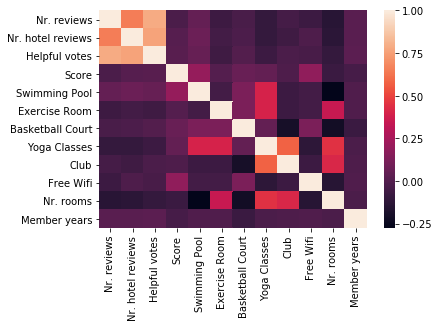

In [149]:
sns.heatmap(data.corr())

In [153]:
g = data.groupby(['Nr. rooms']).agg(['count', 'mean', 'median'])['Score']
g

,count,mean,median
Nr. rooms,,,
188,24,4.083333,4.5
315,24,3.958333,4.0
716,24,4.208333,5.0
732,24,4.541667,5.0
787,24,4.375000,4.5
826,24,3.916667,4.0
1228,24,4.166667,4.5
1282,24,4.375000,5.0
1467,24,4.041667,4.0


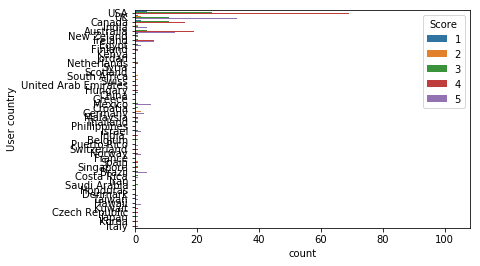

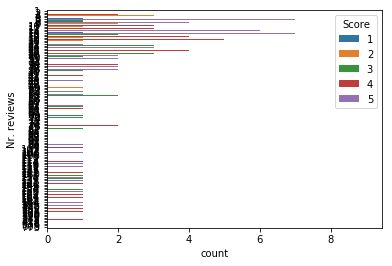

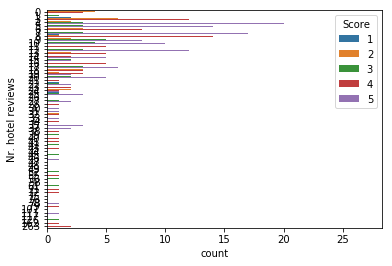

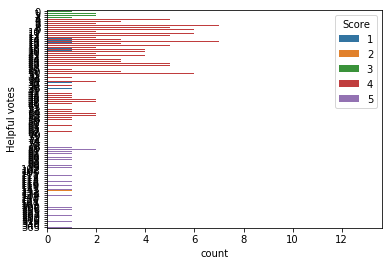

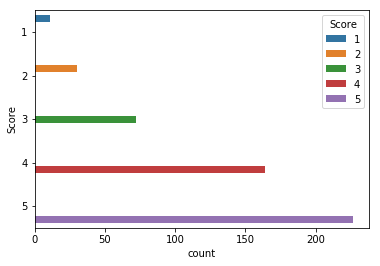

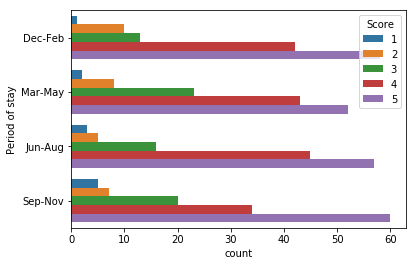

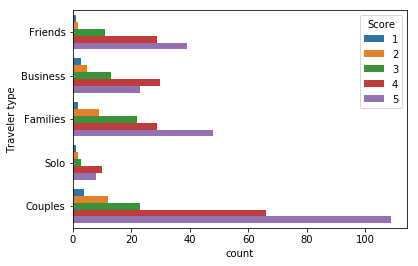

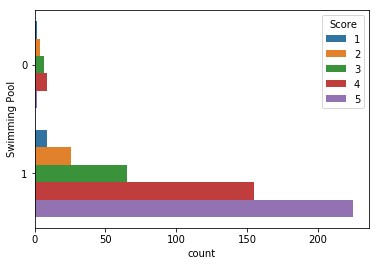

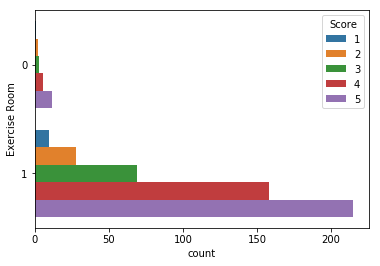

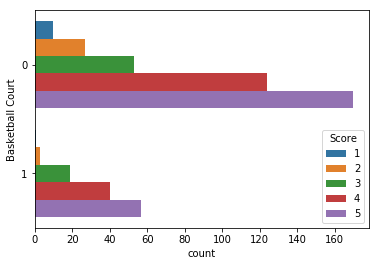

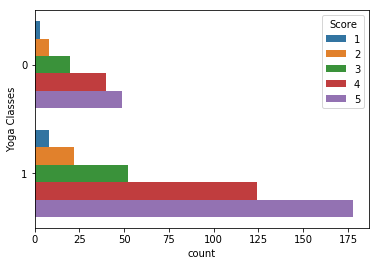

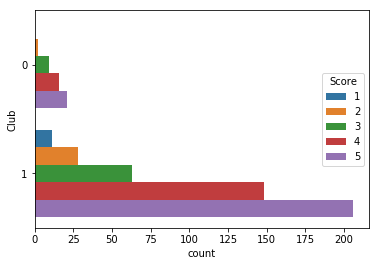

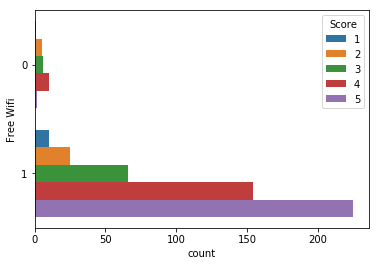

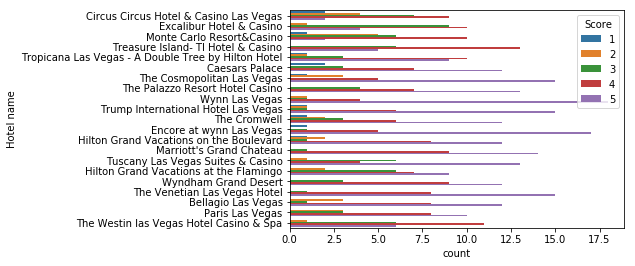

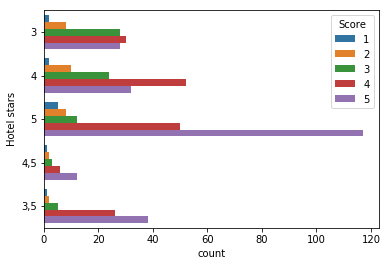

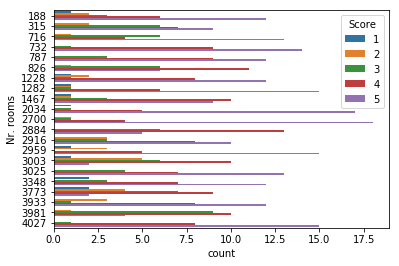

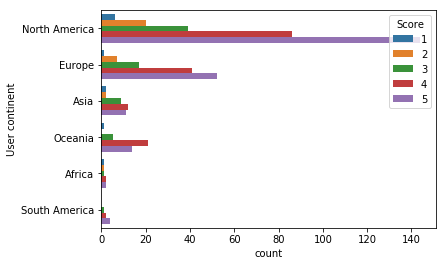

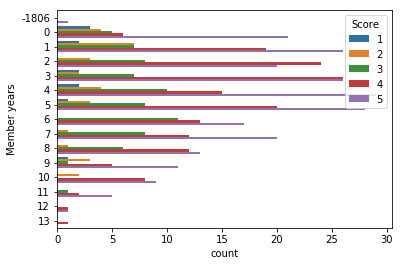

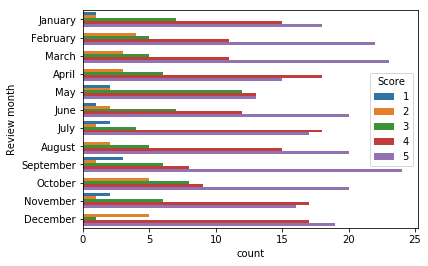

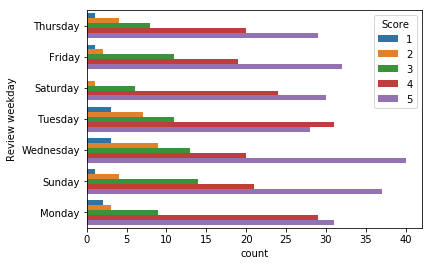

In [15]:
for x in data.columns:
    plt.figure()
    sns.countplot(data=data, y=x, hue='Score')

Let's consolidate some facts here. 
* Hotels in this dataset are generally rated towards the higher side. The mean, median are around 4 stars.
* No of hotels are equally distributed in this dataset (pretty convenient!).
* The traveler type could be a viable important measure.
* In the amenities, Free Wifi and Swimming Pool seem to be important factors for getting a 5 star rating.
* 5 and (4,5),(3,5) star hotels have more 5 star scores.
* The User continent feature should be examined closely.

In [16]:
data['Helpful votes'].describe()

count    504.000000
mean      31.751984
std       48.520783
min        0.000000
25%        8.000000
50%       16.000000
75%       35.000000
max      365.000000
Name: Helpful votes, dtype: float64

In [278]:
data[data['Score'] == 2]

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,...,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday,amenities,s&b
10,USA,102,24,58,2,Jun-Aug,Families,0,1,0,...,1,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,June,Friday,3,0
12,USA,7,6,9,2,Jun-Aug,Friends,0,1,0,...,1,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,1,July,Wednesday,3,0
19,USA,8,7,26,2,Sep-Nov,Couples,0,1,0,...,1,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,10,October,Monday,3,0
23,USA,4,4,3,2,Dec-Feb,Couples,0,1,0,...,1,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,5,December,Sunday,3,0
39,USA,24,6,9,2,Jun-Aug,Families,1,1,0,...,1,Excalibur Hotel & Casino,3,3981,North America,2,August,Wednesday,5,1
50,USA,418,32,132,2,Dec-Feb,Couples,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,North America,3,February,Tuesday,4,0
55,South Africa,54,18,16,2,Mar-May,Business,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,Africa,5,April,Tuesday,4,0
62,Swiss,36,19,36,2,Jun-Aug,Solo,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,Europe,5,August,Thursday,4,0
67,USA,13,3,3,2,Sep-Nov,Couples,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,North America,1,October,Sunday,4,0
70,Greece,21,18,6,2,Dec-Feb,Business,1,1,0,...,0,Monte Carlo Resort&Casino,4,3003,Europe,0,December,Sunday,4,0


In [17]:
# data['Helpful votes_cut'] = pd.cut(data['Helpful votes'], bins=10)
# data['Helpful votes_qcut'] = pd.qcut(data['Helpful votes'], q=4)

In [18]:
# sns.countplot(data=data, y='Helpful votes_qcut', hue='Score')

In [19]:
cols_to_examine = ['Helpful votes', 'Period of stay', 'Traveler type', 'Swimming Pool',
                   'Exercise Room','Yoga Classes','Basketball Court', 'Club', 'Free Wifi',
                   'Hotel stars', 'User continent']

In [20]:
for x in cols_to_examine:
    g = data.groupby(x).agg(['count', 'mean', 'median'])['Score']
    print(g)

               count      mean  median
Helpful votes                         
0                  4  4.000000     4.0
1                 17  4.352941     5.0
2                 16  3.937500     4.0
3                 18  4.000000     5.0
4                 21  4.428571     5.0
5                 14  4.285714     5.0
6                 15  4.200000     5.0
7                 17  4.470588     5.0
8                 20  4.100000     4.5
9                 19  3.736842     4.0
10                 9  4.111111     5.0
11                15  3.800000     4.0
12                13  4.461538     5.0
13                13  4.538462     5.0
14                16  4.062500     4.5
15                14  4.214286     4.0
16                19  3.789474     4.0
17                14  4.285714     4.5
18                 4  4.500000     4.5
19                11  3.454545     4.0
20                 6  3.666667     4.0
21                 7  4.142857     4.0
22                 7  3.857143     4.0
23                 6  4.3

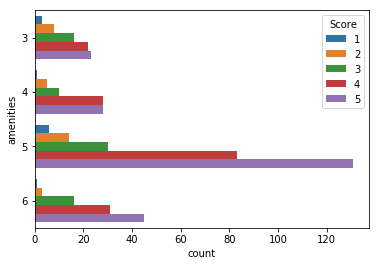

In [157]:
data['amenities'] = data['Swimming Pool'] + data['Exercise Room'] + data['Yoga Classes'] + data['Basketball Court'] + data['Club']  + data['Free Wifi']
sns.countplot(data=data, y='amenities', hue='Score')

In [160]:
data['s&b'] = data['Swimming Pool'] & data['Free Wifi']

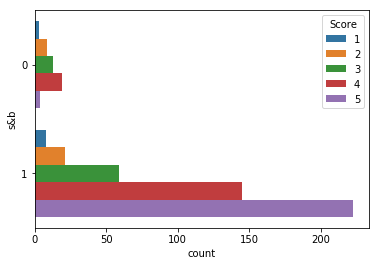

In [161]:
sns.countplot(data=data, y='s&b', hue='Score')

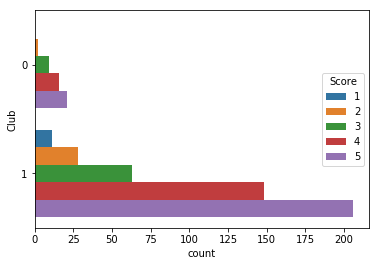

In [164]:
sns.countplot(data=data, y='Club', hue='Score')

# Fit test a model

In [165]:
data_hot = pd.get_dummies(data, columns=['Traveler type','Hotel name','Hotel stars'])

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [167]:
data_hot.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Swimming Pool', 'Exercise Room',
       'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi', 'Nr. rooms',
       'User continent', 'Member years', 'Review month', 'Review weekday',
       'amenities', 's&b', 'Traveler type_Business', 'Traveler type_Couples',
       'Traveler type_Families', 'Traveler type_Friends', 'Traveler type_Solo',
       'Hotel name_Bellagio Las Vegas', 'Hotel name_Caesars Palace',
       'Hotel name_Circus Circus Hotel & Casino Las Vegas',
       'Hotel name_Encore at wynn Las Vegas',
       'Hotel name_Excalibur Hotel & Casino',
       'Hotel name_Hilton Grand Vacations at the Flamingo',
       'Hotel name_Hilton Grand Vacations on the Boulevard',
       'Hotel name_Marriott's Grand Chateau',
       'Hotel name_Monte Carlo Resort&Casino', 'Hotel name_Paris Las Vegas',
       'Hotel name_The Cosmopolitan Las Vegas', 'Hotel name_The Cromwell',
      

In [135]:
COLS = []
for x in data_hot.columns:
    if x != 'Score':
        COLS.append(x)

In [208]:
from sklearn.model_selection import KFold, StratifiedKFold

In [241]:
COLS_TO_MODEL = ['Swimming Pool', 'Exercise Room',
       'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi','amenities', 's&b', 'Traveler type_Business', 'Traveler type_Couples',
       'Traveler type_Families', 'Traveler type_Friends', 'Traveler type_Solo','Hotel stars_3', 'Hotel stars_4', 'Hotel stars_5', 'Hotel stars_3,5',
       'Hotel stars_4,5']

In [258]:
kf = KFold(n_splits=5, shuffle=True)

In [259]:
#indices = list(kf.split(data_hot[COLS_TO_MODEL], data_hot['Score']))

In [266]:
clf = SVC()

In [267]:
from sklearn.metrics import mean_squared_error

In [273]:
indices = list(kf.split(data_hot[COLS], data_hot['Score']))
for train_index, test_index in indices:
    train_index = list(train_index)
    test_index = list(test_index)
    X_train = data_hot[COLS_TO_MODEL].iloc[train_index]
    y_train = data_hot.Score.iloc[train_index]
    X_test = data_hot[COLS_TO_MODEL].iloc[test_index]
    y_test = data_hot.Score.iloc[test_index]
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    #print(predict[:10])
    #predict = np.round(predict)
    #print(*zip(predict, y_test))
    print(mean_squared_error(predict, y_test))

1.2277227722772277
1.2079207920792079
1.811881188118812
1.3663366336633664
1.31


In [222]:
# X_train, X_test, y_train, y_test = train_test_split(data_hot[COLS_TO_MODEL], data_hot['Score'])

In [247]:
import mord as m
from sklearn.svm import SVC, SVR

In [224]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [225]:
predict = clf.predict(X_test)

In [226]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
accuracy_score(predict, y_test)

0.5079365079365079

In [227]:
print(*zip(COLS_TO_MODEL, clf.feature_importances_))

('Swimming Pool', 0.014417459599781654) ('amenities', 0.3671386793710406) ('s&b', 0.2224977982035242) ('Hotel stars_3', 0.09305448638700677) ('Hotel stars_4', 0.1300464035907121) ('Hotel stars_5', 0.17284517284793474)
